<a href="https://colab.research.google.com/github/nakshith21/capstone-project--Book-recommendation-system/blob/main/Books_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Books Recommendation System**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

**Importing libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Dataset**

In [ ]:
book_data= pd.read_csv('/content/drive/MyDrive/capstone project book recommendation system/data_book_recommendation/Books.csv')
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
user_data= pd.read_csv('/content/drive/MyDrive/capstone project book recommendation system/data_book_recommendation/Users.csv')
user_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
rating_data= pd.read_csv('/content/drive/MyDrive/capstone project book recommendation system/data_book_recommendation/Ratings.csv')
rating_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


**Data Preprocessing**

In [ ]:
book_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)
book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')
user_data.columns= user_data.columns.str.strip().str.lower().str.replace('-', '_')
rating_data.columns= rating_data.columns.str.strip().str.lower().str.replace('-', '_')

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
book_data.dtypes

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
dtype: object

In [ ]:
book_data.isnull().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64

Let's take care of the missing value in 'book_author' column.

In [ ]:
book_data.loc[(book_data['book_author'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


In [ ]:
book_data.loc[(book_data['isbn'] == '9627982032'),'book_author'] = 'Other'

Let's look at the unique years to realize the time period as this dataset was created in 2004.

In [ ]:
book_data['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

We can see there are three string values in the 'year_of_publication' column. Let's check at the corresponding rows in the dataframe.

In [ ]:
book_data[book_data['year_of_publication'] == 'DK Publishing Inc'] 

,isbn,book_title,book_author,year_of_publication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [ ]:
book_data[book_data['year_of_publication'] == 'Gallimard']

,isbn,book_title,book_author,year_of_publication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


Persumably there has been a shift in the values of this three rows. Let's bring them in the right place.

In [ ]:
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [ ]:
replace_df_value(book_data, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(book_data, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(book_data, 209538, 'year_of_publication', 2000)
replace_df_value(book_data, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(book_data, 221678, 'book_author', 'James Buckley')
replace_df_value(book_data, 221678, 'year_of_publication', 2000)
replace_df_value(book_data, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(book_data, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(book_data, 220731, 'year_of_publication', 2003)
replace_df_value(book_data, 220731, 'publisher', 'Gallimard')

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


Let's check if the corrections are made properly.

In [ ]:
book_data.loc[221678]

isbn                   0789466953                                                                                
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
book_author            James Buckley                                                                             
year_of_publication    2000                                                                                      
publisher              DK Publishing Inc                                                                         
Name: 221678, dtype: object

So the corrections are made. We've seen there are two missing values in the 'publisher' column. Let's take care of that.

In [ ]:
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [ ]:
book_data.loc[(book_data['isbn'] == '193169656X'),'publisher'] = 'No Mention'
book_data.loc[(book_data['isbn'] == '1931696993'),'publisher'] = 'No Mention'

Let's investigate the user_rating dataset

In [ ]:
user_data.shape

(278858, 3)

In [ ]:
user_data['user_id'].unique()

array([     1,      2,      3, ..., 278856, 278857, 278858])

So user_id's alright. Let's check out the age of the users.

In [ ]:
user_data['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [ ]:
user_data.loc[(user_data['age'] > 90) | (user_data['age'] < 5)] = np.nan
user_data['age'].fillna((user_data['age'].mean()), inplace=True)
user_data['age']= user_data['age'].astype('int64')
user_data['age'].unique()

array([34, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 24, 20, 23, 51, 31, 21,
       44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 35, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67, 80, 52, 69, 71, 73, 78,  9, 64, 12, 74, 75, 76, 83,
       68, 11, 77, 70,  8,  7, 81, 10,  5,  6, 84, 82, 90, 85, 86, 87, 89,
       88])

We need to investigate out rating dataset too.

In [ ]:
rating_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


I'll only take the ISBNs that also belongs to the main book_data set.

In [ ]:
unique_ratings = rating_data[rating_data.isbn.isin(book_data.isbn)]

Ratings dataset should have ratings from users which exist in users dataset, unless new users are added to users dataset

In [ ]:
rating_data = rating_data[rating_data.user_id.isin(user_data.user_id)]

In [ ]:
rating_data.shape


(1142978, 3)

In [ ]:
unique_ratings.shape


(1031136, 3)

In [ ]:

book_data.shape


(271360, 5)

In [ ]:
user_data.shape

(278858, 3)

In [ ]:
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

# **Visualization**

The age distribution of the readers:

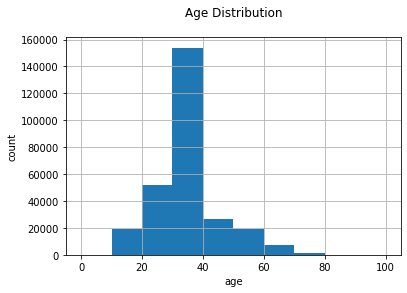

In [ ]:
user_data.age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution\n')
plt.xlabel('age')
plt.ylabel('count')
plt.savefig('age_dist.png', bbox_inches='tight')
plt.show()

Let's see which rating people tend to give more :

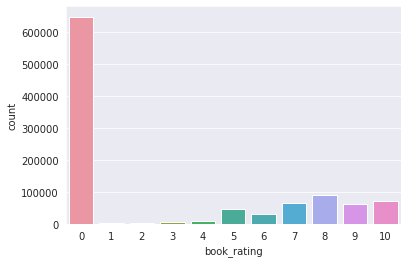

In [ ]:
sns.set_style('darkgrid')
sns.countplot(data= unique_ratings , x='book_rating')
plt.show()

This countplot shows users have rated 0 the most, which can mean they haven't rated books at all. We have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0.

In [ ]:
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]

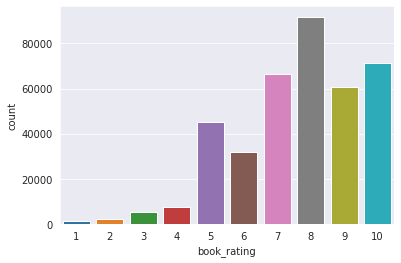

In [ ]:
sns.set_style('darkgrid')
sns.countplot(data= ratings_explicit , x='book_rating')
plt.show()

Now this countplot of bookRating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times.

It was shown earlier that some of the year_of_publication inputs are in string format and some are in integer. I will convert all of them to float now.

In [ ]:
book_data.year_of_publication = pd.to_numeric(book_data.year_of_publication, errors='coerce')

# Check for 0's or NaNs in Year of Publication
zero_year = book_data[book_data.year_of_publication == 0].year_of_publication.count()
nan_year = book_data.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
book_data.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


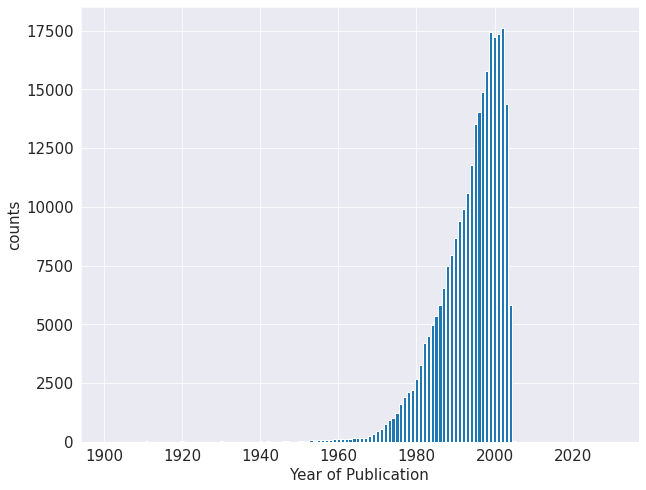

In [ ]:
year = book_data.year_of_publication.value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

So we can see publication years are somewhat between 1950 - 2005 here.

# **Collaborative Filtering using K-Means**

We want to get the information whether or not a person likes that book for our filtering.
Criteria for that will be : If a person rates a book more than his/her average rating then he/she likes the book.

In [ ]:
# Taking the mean of rating given by each user
User_rating_mean = rating_data.groupby('user_id')['book_rating'].mean()
user_rating = rating_data.set_index('user_id')
user_rating['mean_rating'] = User_rating_mean
user_rating.reset_index(inplace=True)
# Keeping the books in which users "likes" the book
user_rating = user_rating[user_rating['book_rating'] > user_rating['mean_rating']]
# Initializing a dummy variable for future use
user_rating['is_fav'] = 1
print(user_rating.shape)
user_rating.head()

(351251, 5)


,user_id,isbn,book_rating,mean_rating,is_fav
4,276729,0521795028,6,4.5,1
16,276747,0060517794,9,5.0,1
19,276747,0671537458,9,5.0,1
20,276747,0679776818,8,5.0,1
21,276747,0943066433,7,5.0,1


In [ ]:
# Keeping the users who like more than 10 books and less than 100 books 
val = user_rating['user_id'].value_counts()
list_to_keep = list(val[(val>10) & (val<100)].index)
user_rating = user_rating[user_rating['user_id'].isin(list_to_keep)]
user_rating.shape

(153456, 5)

In [ ]:
user_rating.describe()

,user_id,book_rating,mean_rating,is_fav
count,153456.000000,153456.000000,153456.000000,153456.0
mean,139766.159655,7.858956,3.824438,1.0
std,79691.779386,1.657090,1.916164,0.0
min,183.000000,1.000000,0.016291,1.0
25%,71739.000000,7.000000,2.382775,1.0
50%,138543.000000,8.000000,3.613485,1.0
75%,208451.000000,9.000000,5.016129,1.0
max,278851.000000,10.000000,9.950000,1.0


Creating crosstab for each user and each book

In [ ]:
df = pd.pivot_table(user_rating,index='user_id',columns='isbn',values='is_fav')
df.fillna(value=0,inplace=True)
print(df.shape)
df.head(10)

(5448, 83416)
CPU times: user 8.5 s, sys: 2.79 s, total: 11.3 s
Wall time: 13.6 s


In [ ]:
df.shape #(no. of users to be clustered,no. of books that they like from)

(5448, 83416)

Using PCA for dimension reduction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df)
pca_fit = pca.transform(df)

In [ ]:
pca_fit = pd.DataFrame(pca_fit,index=df.index)
pca_fit

,0,1,2
user_id,,,
183,-0.229121,-0.023970,0.046365
242,-0.192302,-0.015958,0.036900
243,0.328148,-0.244952,-0.185583
254,0.819397,1.866520,0.217827
388,-0.136567,-0.031893,0.016822
...,...,...,...
278554,-0.129361,-0.051264,0.012763
278582,0.009102,-0.083197,-0.126357
278633,0.771145,-0.484096,0.710366


# Choosing value for K

# Silhouette Analysis

In [ ]:
from sklearn.metrics import silhouette_score ,silhouette_samples
for n in [2,3,4,5,6,7,8]:
  km = KMeans(n_clusters=n,random_state=0)
  clusters = km.fit_predict(pca_fit)
  silhouette_avg = silhouette_score(pca_fit, clusters)
  print("For n_clusters =", n,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.7246440630264265
For n_clusters = 3 The average silhouette_score is : 0.6711916007114602
For n_clusters = 4 The average silhouette_score is : 0.6682637986000894
For n_clusters = 5 The average silhouette_score is : 0.5885817459186526
For n_clusters = 6 The average silhouette_score is : 0.6037061232528691
For n_clusters = 7 The average silhouette_score is : 0.5966723111929981
For n_clusters = 8 The average silhouette_score is : 0.5264456810087846


Seems like K = 2 provides the best Clustering

# Applying Clustering

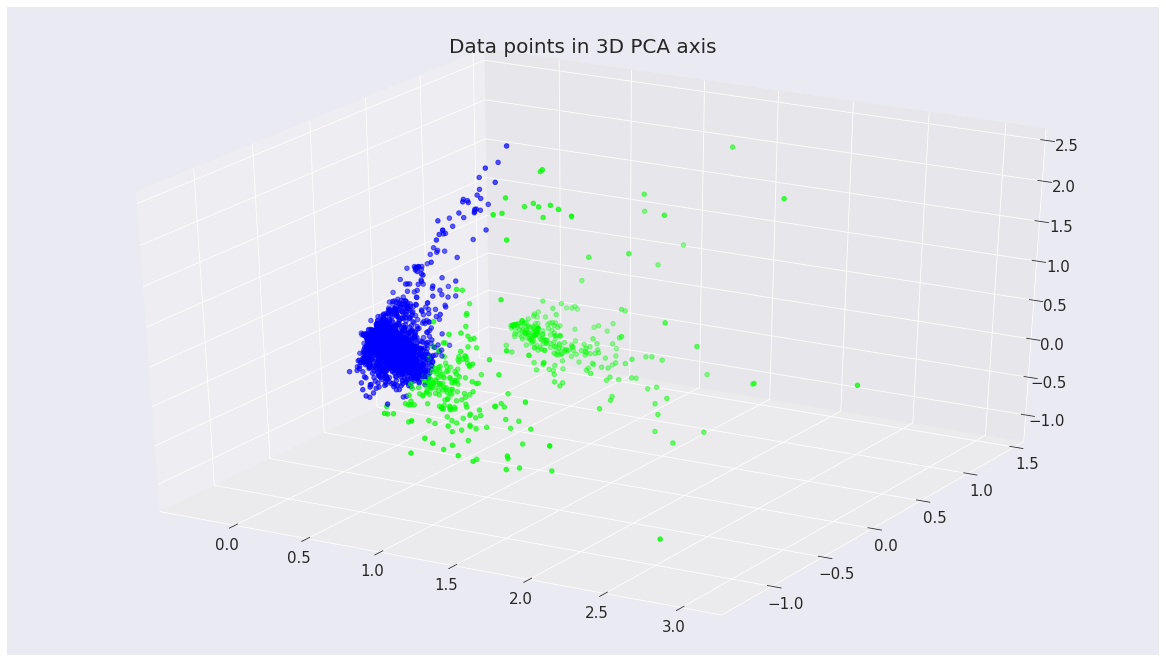

In [ ]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
Kmm = KMeans(n_clusters=2)
plt.rcParams['figure.figsize'] = (16, 9)
clusters = Kmm.fit_predict(pca_fit)
cmhot = plt.get_cmap('brg')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_fit[0], pca_fit[2], pca_fit[1],c=clusters,cmap=cmhot)
plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

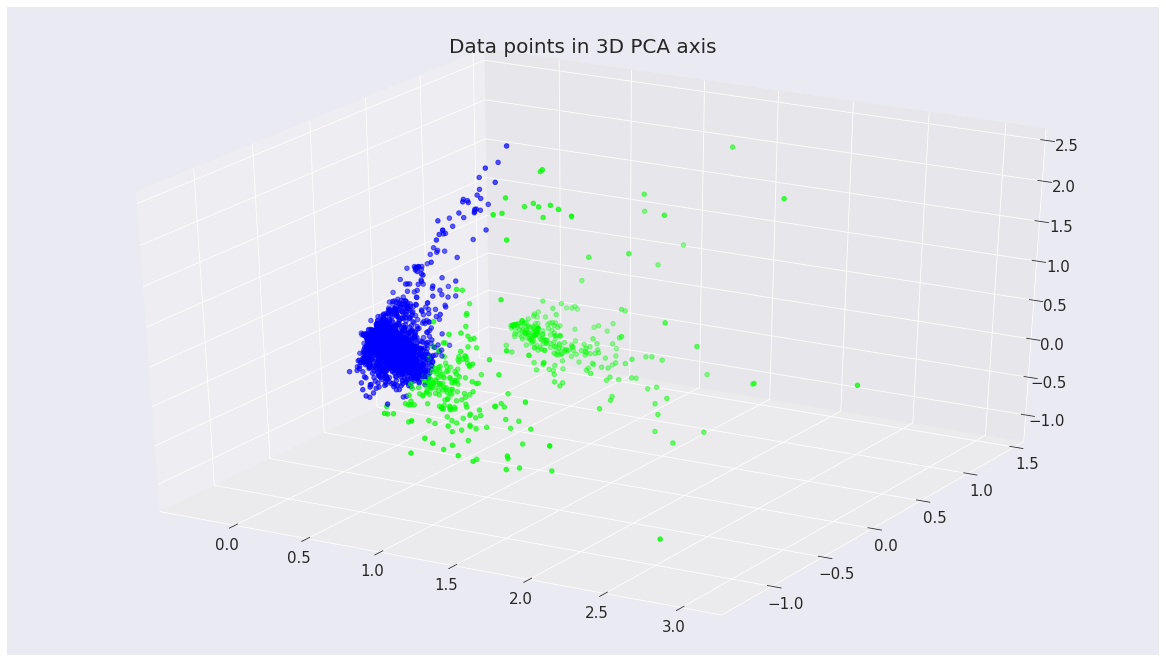

In [ ]:
Kmeans_final = KMeans(n_clusters=2,random_state=0).fit(pca_fit)
df['cluster'] = Kmeans_final.labels_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_fit[0], pca_fit[2], pca_fit[1],c=df['cluster'],cmap=cmhot)
plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()
# Gettings the books for each cluster
cl1_books = df[df.cluster == 0].mean()
cl2_books = df[df.cluster == 1].mean()

# Getting the users for each cluster
cl1_users = df[df.cluster == 0].index
cl2_users = df[df.cluster == 1].index


Analysing Clusters

Cluster 1

Books and Authors

In [ ]:
def cluster_books_des(Ser):
    bks = pd.DataFrame(Ser).merge(book_data,left_index=True,right_on='isbn',how='left')
    bks.rename(columns={0:'avg_score'},inplace=True)
    bks.sort_values(by='avg_score',ascending=False,inplace=True)
    print('Median Year:',int(bks['year_of_publication'].median()))
    print('\nTop 5 Books\n')
    Top5_books = bks.index[:5]
    for i,isbn in enumerate(Top5_books):
        print(str(i+1)+'.',bks.loc[isbn]['book_title'])
    Top5_authors = bks['book_author'].unique()[:5]
    print('Top 5 Authors\n')
    for i,auth in enumerate(Top5_authors):
        print(str(i+1)+'.',auth)
cluster_books_des(cl1_books)

Median Year: 1997

Top 5 Books

1. The Da Vinci Code
2. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
3. Interview with the Vampire
4. Angels &amp; Demons
5. Harry Potter and the Order of the Phoenix (Book 5)
Top 5 Authors

1. Dan Brown
2. J. K. Rowling
3. Anne Rice
4. Anita Diamant
5. Michael Crichton


Users

Most Common Location: toronto, ontario, canada

Mean Age: 34.848339335734295


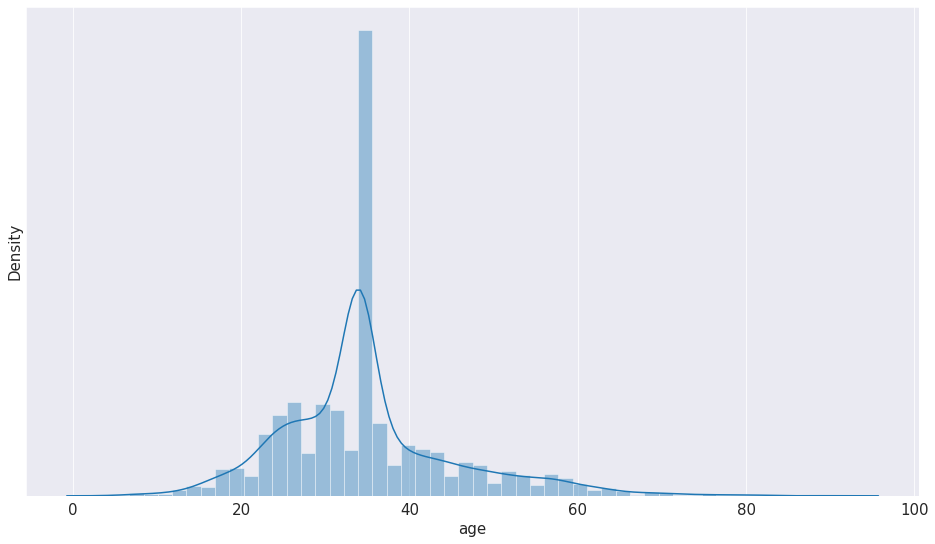

In [ ]:
def cluster_user_des(Ser):
    cl_user = user_data[user_data['user_id'].isin(list(Ser))]
    print('Most Common Location:',cl_user['location'].mode()[0])
    print('\nMean Age:',cl_user['age'].mean())
    sns.distplot(cl_user['age'])
    plt.yticks([])
cluster_user_des(cl1_users)

# Cluster 2

In [ ]:
cluster_books_des(cl2_books.drop('cluster'))

Median Year: 1997

Top 5 Books

1. The Lovely Bones: A Novel
2. Where the Heart Is (Oprah's Book Club (Paperback))
3. The Secret Life of Bees
4. The Red Tent (Bestselling Backlist)
5. The Da Vinci Code
Top 5 Authors

1. Alice Sebold
2. Billie Letts
3. Sue Monk Kidd
4. Anita Diamant
5. Dan Brown


Most Common Location: chicago, illinois, usa

Mean Age: 33.617777777777775


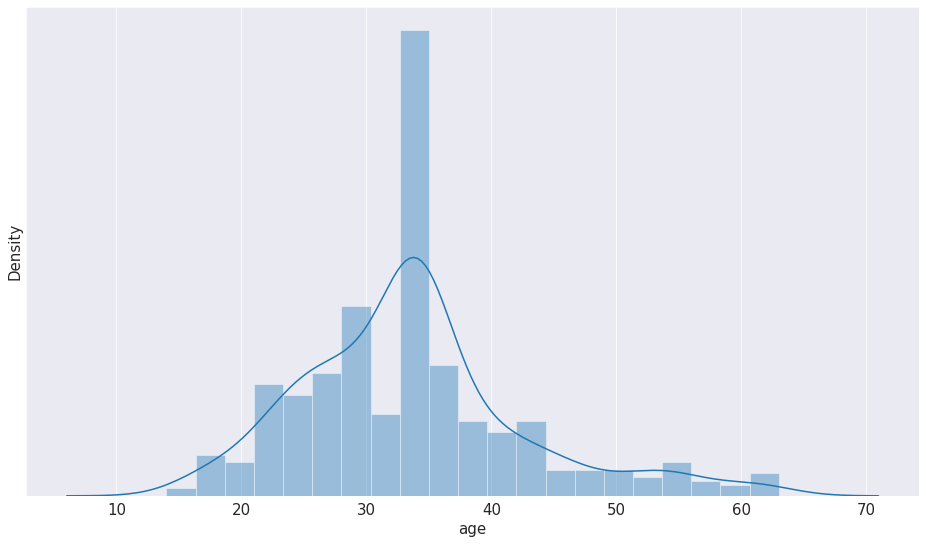

In [ ]:
cluster_user_des(cl2_users)